In [6]:
#Adiabatic quantum computing gate of Ising model of number partitioning

from qiskit import QuantumCircuit, Aer, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator
import numpy as np
import math

def Rx(qc, theta, q):
    qc.rx(theta, q)

def Rz(qc, phi, q):
    qc.rz(phi, q)

def Rzz(qc, phi, q1, q2):
    qc.cx(q1, q2)
    Rz(qc, -2.0*phi, q2)
    qc.cx(q1, q2)

cn = "Qp13-4"
ns = 4
tm = 10
dt = 0.1

qr = QuantumRegister(ns, 'qr')
cr = ClassicalRegister(ns, 'cr')
qc = QuantumCircuit(qr, cr)

for n in range(ns):
    qc.h(qr[n])

step = math.floor(tm / dt)
number = np.array([1, 2, 3, 4])
J = np.array([[0 for column in range(ns)] for row in range(ns)])
for i in range(ns):
    for j in range(ns):
        J[i][j] = number[i] * number[j]

print("J = " + str(J))

hx = -1.0
for n in range(step):
    s = n / step
    for i in range(ns):
        Rx(qc, -2.0 * (1 - s) * hx * dt, qr[i])
        for j in range(ns):
            if i < j:
                Rzz(qc, s * J[i][j] * dt, qr[i], qr[j])

for n in range(ns):
    qc.measure(qr[ns - 1 - n], cr[n])

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit, shots=1000)
result = simulator.run(qobj).result()

counts = result.get_counts()
print(counts)
plot_histogram(counts)

'''
from qiskit import QuantumProgram
from qiskit.tools.visualization import plot_histogram
import math
def Rx(qci, theta, q):
    qci.u3(theta, -math.pi/2, math.pi/2, q)
def Rz(qci, phi, q):
    qci.u1(phi, q)
def Rzz(qci, phi, q1, q2):
    qci.cx(q1, q2)
    Rz(qci, -2.0*phi, q2)
    qci.cx(q1, q2)
qp = QuantumProgram()
cn = "Qp13-4"
ns = 4
tm = 10
dt = 0.1
qr = qp.create_quantum_register("qr", ns)
cr = qp.create_classical_register("cr", ns)
qc = qp.create_circuit(cn, [qr], [cr])
for n in range(0, ns):
    qc.h(qr[n])
step = math.floor(tm/dt)
number = np.array([1,2,3,4])
J = np.array([[0 for column in range(ns)] for row in range(ns)])
for i in range(0, ns):
    for j in range(0, ns):
        J[i][j] = number[i]*number[j]
print("J = "+str(J))
hx = -1.0
for n in range(0, step):
    s = n / step
    for i in range(0, ns):
        Rx(qc, -2.0*(1-s)*hx*dt, qr[i])
        for j in range(0, ns):
            if i < j:
                Rzz(qc, s*J[i][j]*dt, qr[i], qr[j])
for n in range(0, ns):
    qc.measure(qr[ns-1-n], cr[n])
r = qp.execute(cn, timeout = 6000, shots = 1000)
print(r.get_data(cn))
plot_histogram(r.get_counts(cn))
'''

J = [[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]]
{'0100': 1, '0001': 6, '1011': 1, '0111': 4, '0011': 1, '1010': 11, '1110': 4, '0101': 15, '1000': 3, '1001': 504, '0110': 450}


/tmp/ipykernel_49400/383502954.py:56: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


'\nfrom qiskit import QuantumProgram\nfrom qiskit.tools.visualization import plot_histogram\nimport math\ndef Rx(qci, theta, q):\n    qci.u3(theta, -math.pi/2, math.pi/2, q)\ndef Rz(qci, phi, q):\n    qci.u1(phi, q)\ndef Rzz(qci, phi, q1, q2):\n    qci.cx(q1, q2)\n    Rz(qci, -2.0*phi, q2)\n    qci.cx(q1, q2)\nqp = QuantumProgram()\ncn = "Qp13-4"\nns = 4\ntm = 10\ndt = 0.1\nqr = qp.create_quantum_register("qr", ns)\ncr = qp.create_classical_register("cr", ns)\nqc = qp.create_circuit(cn, [qr], [cr])\nfor n in range(0, ns):\n    qc.h(qr[n])\nstep = math.floor(tm/dt)\nnumber = np.array([1,2,3,4])\nJ = np.array([[0 for column in range(ns)] for row in range(ns)])\nfor i in range(0, ns):\n    for j in range(0, ns):\n        J[i][j] = number[i]*number[j]\nprint("J = "+str(J))\nhx = -1.0\nfor n in range(0, step):\n    s = n / step\n    for i in range(0, ns):\n        Rx(qc, -2.0*(1-s)*hx*dt, qr[i])\n        for j in range(0, ns):\n            if i < j:\n                Rzz(qc, s*J[i][j]*dt, qr

J = [[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]]
{'0010': 1, '0001': 7, '1110': 5, '0101': 6, '0100': 1, '0111': 6, '1010': 11, '0110': 455, '1100': 1, '1000': 4, '1001': 503}


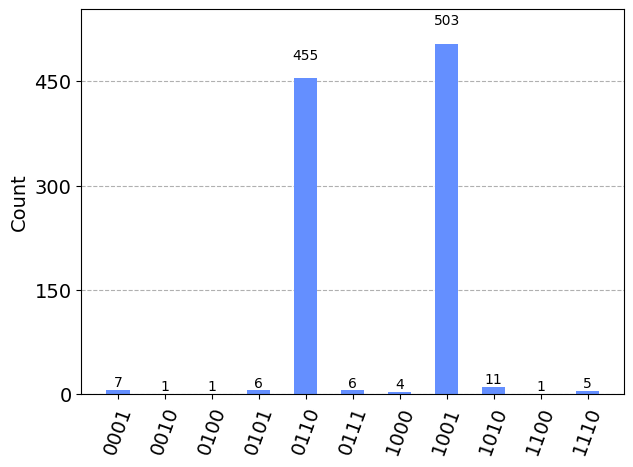

In [7]:
#V2 of #Adiabatic quantum computing gate of Ising model of number partitioning

from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
import numpy as np
import math

def Rx(qc, theta, q):
    qc.rx(theta, q)

def Rz(qc, phi, q):
    qc.rz(phi, q)

def Rzz(qc, phi, q1, q2):
    qc.cx(q1, q2)
    Rz(qc, -2.0*phi, q2)
    qc.cx(q1, q2)

cn = "Qp13-4"
ns = 4 #量子ビットの数
tm = 10
dt = 0.1

qr = QuantumRegister(ns, 'qr')
cr = ClassicalRegister(ns, 'cr')
qc = QuantumCircuit(qr, cr)

for n in range(ns):
    qc.h(qr[n])

step = math.floor(tm / dt)
number = np.array([1, 2, 3, 4])
J = np.array([[0 for column in range(ns)] for row in range(ns)])
for i in range(ns):
    for j in range(ns):
        J[i][j] = number[i] * number[j]

print("J = " + str(J))

hx = -1.0
for n in range(step):
    s = n / step
    for i in range(ns):
        Rx(qc, -2.0 * (1 - s) * hx * dt, qr[i])
        for j in range(ns):
            if i < j:
                Rzz(qc, s * J[i][j] * dt, qr[i], qr[j])

for n in range(ns):
    qc.measure(qr[ns - 1 - n], cr[n])

simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()

counts = result.get_counts()
print(counts)
plot_histogram(counts)

J = [[ 1  4  3  2  6]
 [ 4 16 12  8 24]
 [ 3 12  9  6 18]
 [ 2  8  6  4 12]
 [ 6 24 18 12 36]]
{'01111': 1, '01110': 1, '11000': 1, '11111': 1, '11001': 1, '01101': 6, '11011': 2, '10000': 1, '00111': 2, '00011': 456, '10111': 2, '10010': 6, '00001': 1, '11100': 463, '10101': 5, '11101': 3, '01010': 4, '10011': 10, '01100': 10, '00101': 7, '01001': 2, '11010': 7, '00010': 4, '00000': 1, '00100': 3}


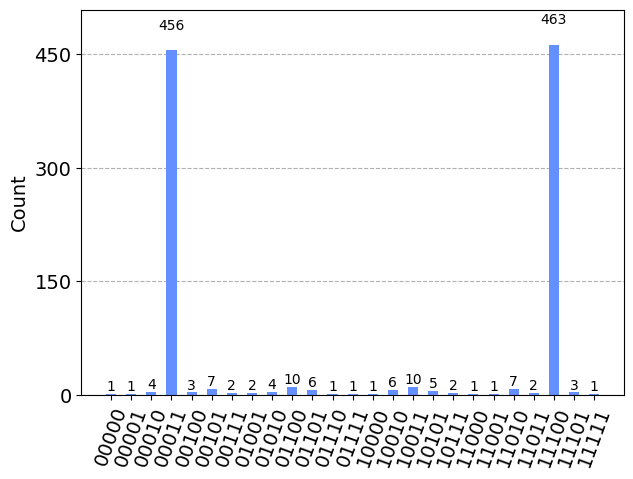

In [16]:
#V3 of #Adiabatic quantum computing gate of Ising model of number partitioning

from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
import numpy as np
import math

def Rx(qc, theta, q):
    qc.rx(theta, q)

def Rz(qc, phi, q):
    qc.rz(phi, q)

def Rzz(qc, phi, q1, q2):
    qc.cx(q1, q2)
    Rz(qc, -2.0*phi, q2)
    qc.cx(q1, q2)

cn = "Qp13-4"
ns = int(input('Number of qubits = ')) #量子ビットの数
tm = 10
dt = 0.1

qr = QuantumRegister(ns, 'qr')
cr = ClassicalRegister(ns, 'cr')
qc = QuantumCircuit(qr, cr)

for n in range(ns):
    qc.h(qr[n])

step = math.floor(tm / dt)
n = int(input('n = '))
number = np.array([])
for k in range(1,n+1):
    number = np.append(number, int(input('The '+str(k)+'-th value is ')))
J = np.array([[0 for column in range(ns)] for row in range(ns)])
for i in range(ns):
    for j in range(ns):
        J[i][j] = number[i] * number[j]

print("J = " + str(J))

hx = -1.0
for n in range(step):
    s = n / step
    for i in range(ns):
        Rx(qc, -2.0 * (1 - s) * hx * dt, qr[i])
        for j in range(ns):
            if i < j:
                Rzz(qc, s * J[i][j] * dt, qr[i], qr[j])

for n in range(ns):
    qc.measure(qr[ns - 1 - n], cr[n])

simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()

counts = result.get_counts()
print(counts)
plot_histogram(counts)